In [1]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
from functools import reduce
from math import exp
# make tests reproducible
random.seed(1)

approximated coeffs: b = -1.2137722544017073, a = -19.052508994195474


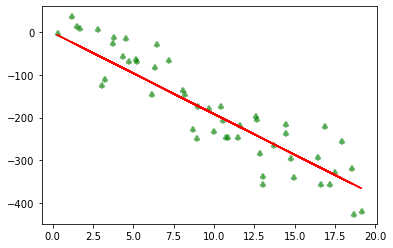

In [2]:
a, b = -20, 10

alpha = 0.0005   # learning rate
epsilon = 0.005 # for stop criteria


num_points = 50
noise = np.random.normal(0, 50, num_points)
x = np.random.uniform(0, 20, num_points)
y = a*x + b + noise

def grad(x, y):
    def eval_coord1(x, y):
        return o[1]*x + o[0] - y

    def eval_coord2(x, y):
        return o[1]*x**2 + o[0]*x - x*y
    
    return 1/len(x) * np.array([sum(map(eval_coord1, x, y)), sum(map(eval_coord2, x, y))])

starting_point = (0, 0)
o = starting_point
while(True):
    tmp = grad(x, y)
    change = alpha * tmp
    #print(change[0]**2 + change[1]**2, epsilon)
    o = o - change
    if((change[0]**2 + change[1]**2)**(1/2) <= epsilon):
        break
print(f'approximated coeffs: b = {o[0]}, a = {o[1]}')

plt.scatter(x, y, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.plot(x, o[1]*x + o[0], color='red')

In [3]:
class1 = np.random.multivariate_normal(
    mean=[2,5],
    cov=[[3, 0],[0, 3]],
    size=200
)
class2 = np.random.multivariate_normal(
    mean=[7,10],
    cov=[[3, 0],[0, 3]],
    size=200
)

# print(len(np.append(class1, class2, axis=0)))
classes_w_labels = (np.append(class1[:100], class2[:100], axis=0), 100*[0] + 100*[1])
# print(classes_w_labels[:10])

classes_w_labels_test = (np.append(class1[100:], class2[100:], axis=0), 100*[0] + 100*[1])

In [4]:
# alpha = 0.005   # learning rate
# epsilon = 0.0005 # for stop criteria

# def grad(x, y):
#     def exp_expr(x):
#         return exp(o[0]+o[1]*x[0]+o[2]*x[1])
    
#     def rev_exp_expr(x):
#         return 1/(1 + exp_expr(x))
    
#     def eval_coord1(x, y):
# #         res = (2*y - 1) / (1 + exp_expr(x))
#         res = (y*(rev_exp_expr(x) - 1) + (y-1)*rev_exp_expr(x))
#         return res

#     def eval_coord2(x, y):
# #         res = x[0]*(2*y - 1) / (1 + exp_expr(x))
#         res = x[0]*(y*(rev_exp_expr(x) - 1) + (y-1)*rev_exp_expr(x))
#         return res
    
#     def eval_coord3(x, y):
# #         res = x[1]*(2*y - 1) / (1 + exp_expr(x))
#         res = x[1]*(y*(rev_exp_expr(x) - 1) + (y-1)*rev_exp_expr(x))
#         return res
    
#     #print(sum(map(eval_coord1, x, y)))
#     return -1/len(x) * np.array(
#         [sum(map(eval_coord1, x, y)),
#          sum(map(eval_coord2, x, y)),
#          sum(map(eval_coord3, x, y))]
#     )

# # print(classes_w_labels)

# o = (10,1,1)
# for i in range(5000):
# # while(True):
#     #print(classes_w_labels)
#     tmp = grad(*classes_w_labels)
#     change = alpha * tmp
#     o = o - change
#     print((change[0]**2 + change[1]**2 + change[2]**2)**(1/2))
# #     if((change[0]**2 + change[1]**2 + change[2]**2)**(1/2) <= epsilon):
# #         break
# print(f'approximated coeffs: o0 = {o[0]}, o1 = {o[1]}, o2 = {o[2]}')


In [5]:
alpha = 0.005   # learning rate
epsilon = 0.0005 # for stop criteria
# bad values:
# alpha = 0.0005   # learning rate
# epsilon = 0.005 # for stop criteria

# ????
def grad(Xs, Y):
    def sigmoid(x):
        return 1/(1 + exp(x))
    
    x1 = np.array(Xs[:len(Xs)//2])
    x2 = np.array(Xs[len(Xs)//2:])
    X = np.array(Xs)
    P0 = np.array([sigmoid(o[0]+o[1]*x[0]+o[2]*x[1]) for x in x1])
    P1 = np.array([sigmoid(o[0]+o[1]*x[0]+o[2]*x[1]) for x in x2])
    P = np.concatenate((P0, P1-1), axis=0)
    
    m = len(Xs)
    r = np.array([0., 0., 0.])
    r[0] = -np.sum(P)/m
    r[1] = -np.dot(X[:,0], P)/m
    r[2] = -np.dot(X[:,1], P)/m
    
    return r

starting_point = (10,1,1)
o = starting_point
while(True):
    tmp = grad(*classes_w_labels)
    change = alpha * tmp
    o = o - change
#     print((change[0]**2 + change[1]**2 + change[2]**2)**(1/2))
    if((change[0]**2 + change[1]**2 + change[2]**2)**(1/2) <= epsilon):
        break

print(f'approximated coeffs: o0 = {o[0]}, o1 = {o[1]}, o2 = {o[2]}')



approximated coeffs: o0 = 9.79539354681092, o1 = -0.4727898263688253, o2 = -1.0446769940255276


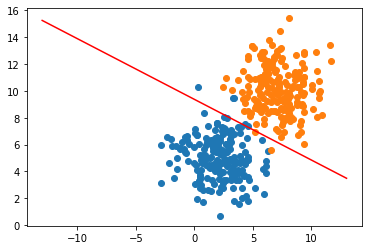

In [6]:
plt.scatter(class1[:, 0], class1[:, 1])
plt.scatter(class2[:, 0], class2[:, 1])
x_plot = np.linspace(-13, 13, 50)

hypo_func = lambda x: o[1]/-o[2]*x + o[0]/-o[2]
plt.plot(x_plot, list(map(hypo_func, x_plot)), color='red')

In [7]:
# print(list(zip(*classes_w_labels)))
def accuracy_func(xs_and_y):
    x = xs_and_y[0]
    y = xs_and_y[1]
    # class 0 below hypo line -> correct
    if (x[1] < hypo_func(x[0]) and y == 0):
        return True
    # class 1 above hypo line -> correct
    if (x[1] > hypo_func(x[0]) and y == 1):
        return True

accuracy = len(list(filter(accuracy_func, zip(*classes_w_labels_test)))) / len(classes_w_labels_test[0])
print(f"accuracy on test data = {accuracy}")

accuracy on test data = 0.98
